# Vizualizace dat s využitím knihovny Pandas

- K vizualizaci v Pandas dochází za pomoci metody plot() využívající sub-modul Pyplot knihovny Matplotlib (samostatná knihovna Python)
- Knihovna pro vizualizaci dat na nízké úrovni (tj. umožňuje bohaté možnosti přizpůsobení vizualizace, nastavení může být složitější)
- Pro vizualizaci jednotlivých bodů slouží metoda plot()
 - metoda přijímá 2 argumenty, první pro body na hodnotě x, druhý pro hodnoty na ose y)
- Pokud nespecifikujeme body na ose x, matplotlib vygeneruje výchozí řadu hodnot
- Jednotlivé typy vizuálů zde https://matplotlib.org/stable/plot_types/index.html
- K vizualizaci dochází v objektu figure (zkráceně fig), do kterého jsou následně dosazovány jednotlivé vizuály (axes)


#### Při práci v Matplotlib je možné pracovat ve dvou režimech:
- State-full (stavový): V tomto režímu nedochází k explicitnímu vytváření figury (objektu pro zobrazení vizuálů), ale je vytvořen implicitně. Všechny metody jsou volány na implicitním objektu.
- State-less (bezstavový): V tomto režímu je nutné vytvořit objekt figury a pracovat s ním explicitně. Tento režim je vhodný pro pokročilé formátování a anotace.

#### Fig
- Objekt pro zobrazení vizuálů.
- Vytvoření objektu figury je možné pomocí metody `figure` z modulu `pyplot`.
- Objekt figury je možné vytvořit s různými parametry (velikost, rozlišení, ...).

#### Axes
- Objekt pro zobrazení dat.
- Vytvoření objektu osy je možné pomocí metody `subplot` z modulu `pyplot`.
- Objekt osy je možné vytvořit s různými parametry (pozice, velikost, ...).
- Pokročilé formátování os lze za pomoci funkce `subplot2grid`, která umožňuje vytvořit mřížku pro zobrazení více grafů v jednom okně.


In [1]:
import pandas as pd

# Stazeni .csv souboru publikovaneho na github.com
url = "https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv"
df = pd.read_csv(url,delimiter = ';')
# Filtrovani dataframe (je vysvetleno pozdeji)
df['DATE']  = pd.to_datetime(df['DATE'])
df.reset_index(inplace=True)



<Axes: xlabel='DATE'>

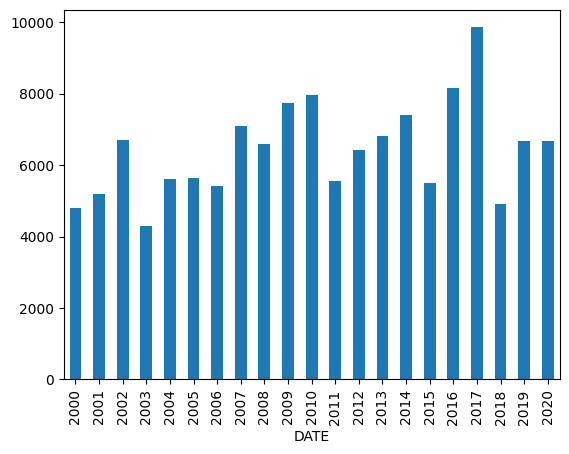

In [2]:
# Vytvoreni dataframe pro vizualizaci
df_yearly = df.groupby(df['DATE'].dt.year)['PRCP'].sum()
df_yearly.plot(kind='bar',y='PRCP')
# Zobrazeni grafu


<BarContainer object of 7601 artists>

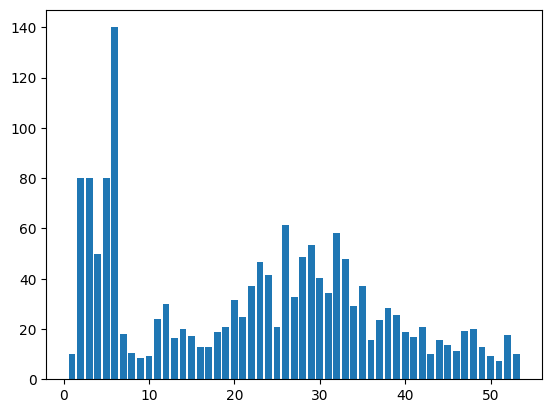

In [3]:
from matplotlib import pyplot as plt
import pandas as pd

# Stazeni .csv souboru publikovaneho na github.com
url = "https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv"
df = pd.read_csv(url,delimiter = ';')
# Filtrovani dataframe (je vysvetleno pozdeji)
df = df.loc[df['NAME']== 'RUZYNE'][['DATE','PRCP']]
df['DATE']  = pd.to_datetime(df['DATE'])
df['MESIC'] = df['DATE'].dt.month
df['ROK'] = df['DATE'].dt.year
df['TYDEN'] = df['DATE'].dt.isocalendar().week
df['DATUM'] = df['DATE'].dt.strftime('%Y/%m')

df2 = df.copy()
df2 = df2.groupby(by=['ROK','TYDEN'],as_index=False)['PRCP'].sum()
df2 = df2.groupby(by=['TYDEN'],as_index=False)['PRCP'].mean()
df2 = df2[df2['TYDEN']<53]
plt.bar(df['TYDEN'],df['PRCP'])


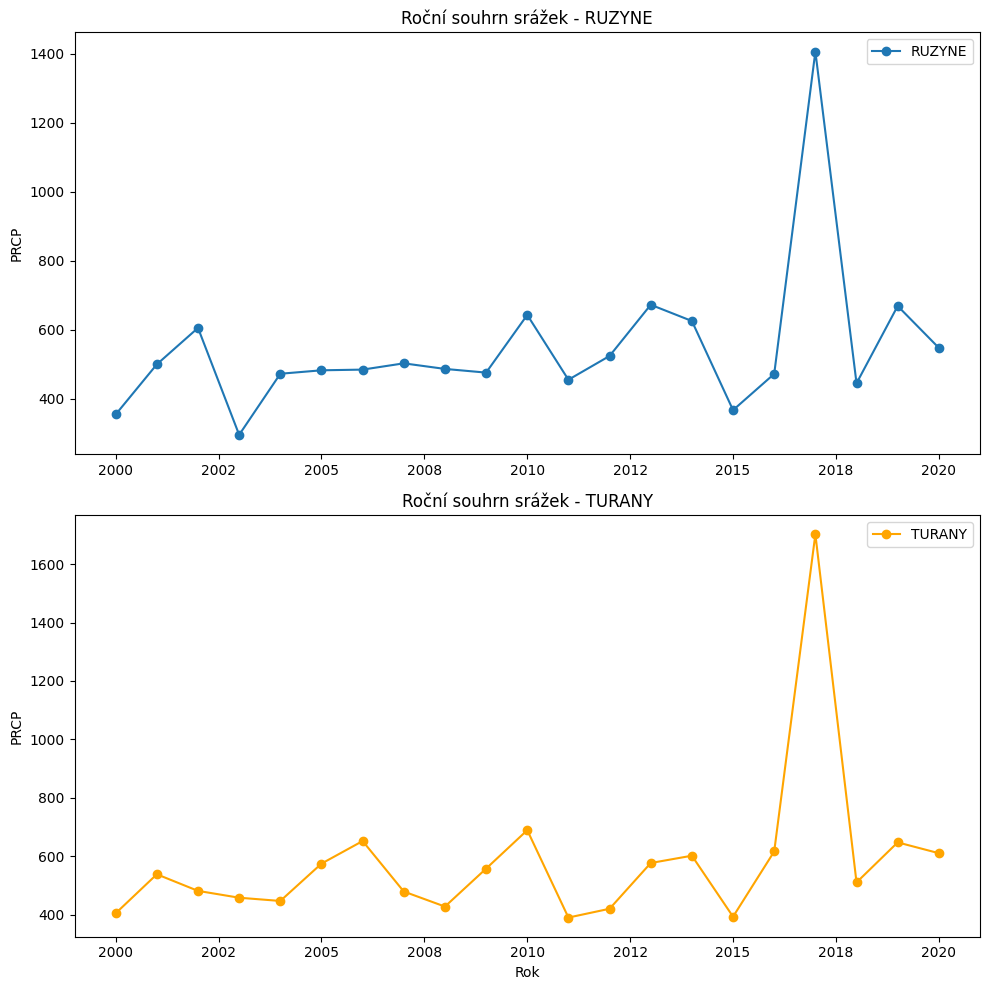

In [7]:
# Načtení dat s použitím středníku jako oddělovače

# Stazeni .csv souboru publikovaneho na github.com
url = "https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv"
df = pd.read_csv(url,delimiter = ';')
df['DATE']  = pd.to_datetime(df['DATE'])
# Skupina podle data a jména, a sečtení srážek

df_yearly = df.groupby([df['DATE'].dt.year, 'NAME'])['PRCP'].sum().reset_index()

# Vytvoření grafu pro RUZYNE a TURANY
fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=False)

# Graf pro RUZYNE
ax[0].plot(df_yearly[df_yearly['NAME'] == 'RUZYNE']['DATE'],
           df_yearly[df_yearly['NAME'] == 'RUZYNE']['PRCP'],
           marker='o', label='RUZYNE')
ax[0].set_title('Roční souhrn srážek - RUZYNE')
ax[0].set_ylabel('PRCP')

# Graf pro TURANY
ax[1].plot(df_yearly[df_yearly['NAME'] == 'TURANY']['DATE'],
           df_yearly[df_yearly['NAME'] == 'TURANY']['PRCP'],
           marker='o', color='orange', label='TURANY')
ax[1].set_title('Roční souhrn srážek - TURANY')
ax[1].set_xlabel('Rok')
ax[1].set_ylabel('PRCP')
# Nastavení formátu osy x pro zobrazení pouze celých čísel
ax[0].xaxis.set_major_formatter('{:.0f}'.format)
ax[1].xaxis.set_major_formatter('{:.0f}'.format)

# Zobrazení grafu
plt.tight_layout()
#show legend
ax[0].legend()
ax[1].legend()
plt.show()


Text(2008, 1200, 'Povodne 2008')

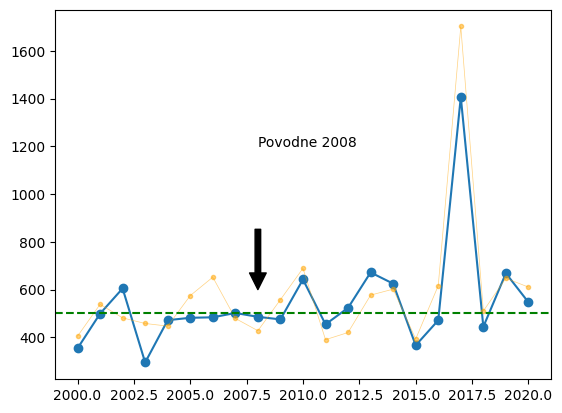

In [23]:
# Načtení dat s použitím středníku jako oddělovače

# Stazeni .csv souboru publikovaneho na github.com
url = "https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv"
df = pd.read_csv(url,delimiter = ';')
df['DATE']  = pd.to_datetime(df['DATE'])
# Skupina podle data a jména, a sečtení srážek

fig,ax = plt.subplots(1,1)
df_yearly = df.groupby([df['DATE'].dt.year, 'NAME'])['PRCP'].sum().reset_index()

df_ruzyne = df_yearly[df_yearly['NAME'] == 'RUZYNE']
df_turany = df_yearly[df_yearly['NAME'] == 'TURANY']

ax.plot(df_ruzyne['DATE'], df_ruzyne['PRCP'], marker='o', label='RUZYNE')
ax.plot(df_turany['DATE'], df_turany['PRCP'], marker='.', color='orange', label='TURANY',linewidth=0.5,alpha=0.5)

#ax.axvline(x=2008, color='r', linestyle='--', label='Povodne 2008')
ax.axhline(y=500, color='g', linestyle='--', label='sucho')

# add annotation
ax.annotate('Povodne 2008', xy=(2008, 600), xytext=(2008, 1200),
             arrowprops=dict(facecolor='black', shrink=0.55))
